In [6]:
!git clone https://github.com/RACHELI7AYALA/mlcourse mlcourse

fatal: destination path 'mlcourse' already exists and is not an empty directory.


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import datetime
from scipy import stats

In [9]:
df =pd.read_csv("mlcourse/Salary_Data.csv")

In [10]:
df.head()

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0


In [97]:
x=df.iloc[:,:-1].values
y=df.iloc[:,-1].values


In [98]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3,random_state=0)

In [99]:
x_test

array([[ 1.5],
       [10.3],
       [ 4.1],
       [ 3.9],
       [ 9.5],
       [ 8.7],
       [ 9.6],
       [ 4. ],
       [ 5.3]])

In [100]:

y_test

array([ 37731., 122391.,  57081.,  63218., 116969., 109431., 112635.,
        55794.,  83088.])

In [102]:
# training the simple linear regresion on trainning set
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(x_train,y_train)

LinearRegression()

In [103]:
y_predict = regressor.predict(x_test)



In [115]:
x_train.resize(1,x_train.size)
y_train.resize(1,y_train.size)
slope, inter, rval, pval, std_err= stats.linregress(x_train,y_train)
slope, intercept, r_value, p_value, std_err = stats.linregress(x_train,y_train)
slope

/usr/local/lib/python3.7/dist-packages/scipy/stats/_stats_mstats_common.py:140: RuntimeWarning: invalid value encountered in sqrt
  t = r * np.sqrt(df / ((1.0 - r + TINY)*(1.0 + r + TINY)))
/usr/local/lib/python3.7/dist-packages/scipy/stats/_stats_mstats_common.py:142: RuntimeWarning: invalid value encountered in sqrt
  sterrest = np.sqrt((1 - r**2) * ssym / ssxm / df)


9360.26128619366

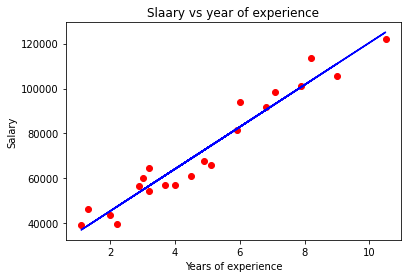

In [104]:
# training set results

plt.scatter(x_train,y_train, color = 'red')
plt.plot(x_train,regressor.predict(x_train), color ='blue')
plt.title('Slaary vs year of experience')
plt.xlabel('Years of experience')
plt.ylabel('Salary')
plt.show()

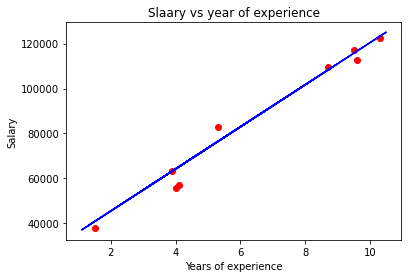

In [ ]:
# test set results

plt.scatter(x_test,y_test, color = 'red')
plt.plot(x_train,regressor.predict(x_train), color ='blue')
plt.title('Slaary vs year of experience')
plt.xlabel('Years of experience')
plt.ylabel('Salary')
plt.show()

In [ ]:
regressor.predict([[5.8]])

array([81066.90680112])

In [ ]:
regressor.coef_

array([9360.26128619])

In [ ]:
regressor.intercept_

26777.391341197632

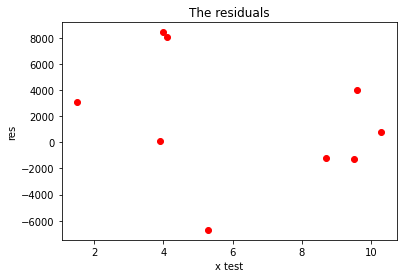

In [61]:
#residuals:
plt.scatter(x_test,y_predict-y_test, color = 'red')
plt.title('The residuals')
plt.xlabel('x test')
plt.ylabel('res')
plt.show()

In [80]:
#mse
from sklearn import metrics
# y_predict = regressor.predict(x_test)
y_train_predict = regressor.predict(x_train.reshape(-1, 1))

print("MSE of test data:" ,metrics.mean_squared_error(y_test,y_predict))
print("MSE of train data:" ,metrics.mean_squared_error(y_train.reshape(-1, 1),y_train_predict))

MSE of test data: 23370078.800832972
MSE of train data: 35116032.63186063


In [96]:
#r2
print("r2:" ,metrics.r2_score(y_train.reshape(-1, 1), y_train_predict.reshape(-1, 1)))

r2: 0.9423777652193379


In [ ]:
# p_value
